# Fashion-MNIST Example with the NVIDIA TensorFlow Container from NGC
 ----

This notebook walks you through the basics of using containers from the NGC Catalog. We chose the GPU optimized TensorFlow container as an example, but the basics of working with docker containers apply to all NGC containers.

We will show you how to:

* Install the Docker Engine on your system
* Pull the TensorFlow container from the NGC Catalog using Docker
* Run the TensorFlow container using Docker
* Execute a simple image classification task using TensorFlow and Jupyter Notebook

Let's get started!

---

### 1. Install the Docker Engine
Go to https://docs.docker.com/engine/install/ to install the Docker Engine on your system.


### 2. Download the TensorFlow container from the NGC Catalog 

Once the Docker Engine is installed on your machine, visit https://ngc.nvidia.com/catalog/containers and search for the TensorFlow container. Click on the TensorFlow card and copy the pull command.

<img src="https://raw.githubusercontent.com/kbojo/images/master/NGC.png">

Open the command line of your machine and past the pull command into your command line. Execute the command to download the container. 

```$ docker pull nvcr.io/nvidia/tensorflow:20.08-tf1-py3```
    
The container starts downloading to your computer. A container image consists of many layers; all of them need to be pulled. 

### 3. Run the TensorFlow container image

Once the container download is completed, run the following code in your command line to run and start the container:

```$ docker run -it --gpus all  -p 8888:8888 -v $PWD:/projects --network=host nvcr.io/nvidia/tensorflow:20.08-tf1-py3```

<img src="https://raw.githubusercontent.com/kbojo/images/master/commandline1.png">

### 4. Install Jupyter lab and open a notebook

Within the container, run the following commands:

```pip install jupyterlab```

```jupyter lab --ip=0.0.0.0 --port=8888 --allow-root```

Open up your favorite browser and enter: http://localhost:8888/?token=*yourtoken*.

<img src="https://raw.githubusercontent.com/kbojo/images/master/commandline2.png">

You should see the Jupyter Lab application. Click on the plus icon to launch a new Python 3 notebook.

Follow along with the image classification with the TensorFlow example provided bellow.

### 5. Fashion-MNIST Image Classification with TensorFlow
Follow the code to train a simple neural network that classifies images of clothing. 

In [57]:
# Import Tensorflow and check version
import tensorflow as tf
# Import TensorFlow Keras
from tensorflow import keras
#Import numpy
import numpy as np
#Import matplotlib
import matplotlib.pyplot as plt

We are going to work with the Fashion-MNIST data set. The data set contains images of Zalando's article images. The images are divided into 10 classes, from 0 to 9, where each class represents a category of clothing:


| Class 	| Name        	|
|-------	|-------------	|
| 0     	| T-shirt/top 	|
| 1     	| Trouser     	|
| 2     	| Pullover    	|
| 3     	| Dress       	|
| 4     	| Coat        	|
| 5     	| Sandal      	|
| 6     	| Shirt       	|
| 7     	| Sneaker     	|
| 8     	| Bag         	|
| 9     	| Ankle boot  	|


The Fashion-MNIST data set is part of the TensorFlow data set module.

In [58]:
# Import the dataset.

fashion_mnist = keras.datasets.fashion_mnist

In [59]:
# Load data set as four numpy arrays: 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# For training the model, we will use train_images and train_labels arrays.
# To test the performance of the trained model, we are going to use the test_images and test_labels arrays.

Let's explore the data set:

In [60]:
print(f'There are {len(train_images)} images in the training set and {len(test_images)} images in the testing set.')

There are 60000 images in the training set and 10000 images in the testing set.


In [61]:
print(f'There are {len(train_labels)} labels in the training set and {len(test_labels)} labels in the test set.')

There are 60000 labels in the training set and 10000 labels in the test set.


In [62]:
print(f'The images are {train_images[0][0].size} x {train_images[0][1].size} NumPy arrays.')

The images are 28 x 28 NumPy arrays.


In [63]:
# The images are labeled with integers ranging from 0 to 9.
train_labels[0:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [64]:
label_cloth_dict = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 
                     3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 
                     7:'Sneaker', 8:'Bag', 9:'Ankle boot' }

In [65]:
def label_name(x):
    return label_cloth_dict[x]

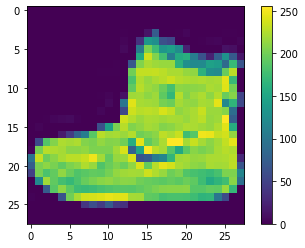

In [66]:
# Let's have a look at one of the images. The following code visualizes the images using the matplotlib library.

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()




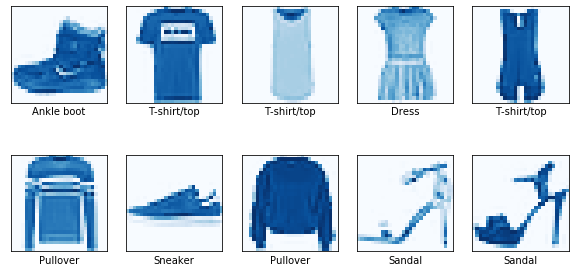

In [67]:
# Let's look again at the first ten images, but this time with the class names.
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Blues')
    plt.xlabel(label_name(train_labels[i]))
plt.show()

In [68]:
# The pixel values range from 0 to 255. 
# Let's divide the image arrays by 255 to scale them to the range 0 to 1.

train_images = train_images / 255.0

test_images = test_images / 255.0

In [69]:
# Let's build the model:

simple_model = keras.Sequential([
    # Flatten two dimansional images into one dimansion 28*28pixles=784pixels.
    keras.layers.Flatten(input_shape=(28, 28)),
    # First dense/ fully connected layer: 128 nodes.
    keras.layers.Dense(128, activation='relu'),
    # Second dense/ fully connected layer: 10 nodes --> Result is a score for each images class.
    keras.layers.Dense(10)])

In [70]:
# Compile the model:
# Define loss function, optimizer, and metrics.

simple_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
# Train the model:
# Let's train 15 epochs. After every epoch, training time, loss, and accuracy will be displayed.

simple_model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 1s 728us/step - loss: 0.4917 - accuracy: 0.8285
Epoch 2/15
1875/1875 [==============================] - 1s 672us/step - loss: 0.3757 - accuracy: 0.8652
Epoch 3/15
1875/1875 [==============================] - 1s 664us/step - loss: 0.3385 - accuracy: 0.8771
Epoch 4/15
1875/1875 [==============================] - 1s 669us/step - loss: 0.3144 - accuracy: 0.8847
Epoch 5/15
1875/1875 [==============================] - 1s 670us/step - loss: 0.2944 - accuracy: 0.8917
Epoch 6/15
1875/1875 [==============================] - 1s 662us/step - loss: 0.2805 - accuracy: 0.8964
Epoch 7/15
1875/1875 [==============================] - 1s 679us/step - loss: 0.2696 - accuracy: 0.8998
Epoch 8/15
1875/1875 [==============================] - 1s 675us/step - loss: 0.2566 - accuracy: 0.9053
Epoch 9/15
1875/1875 [==============================] - 1s 687us/step - loss: 0.2502 - accuracy: 0.9061
Epoch 10/15
1875/1875 [==============================] - 1s 664u

With every epoch, the loss function decreases and the accuracy increases. After 15 epochs, the accuracy is around 92%.

In [72]:
# Let's see how the model performs on the test data:

test_loss, test_acc = simple_model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 542us/step - loss: 0.3482 - accuracy: 0.8836


The accuracy of the predictions is around 88%. 

---

Here you go! You trained your first model and used it to make predictions on test data.
For more advanced TensorFlow examples and in-depth explanations of the different steps, visit https://www.tensorflow.org/tutorials.

To explore all NGC Containers, visit https://ngc.nvidia.com/. The NGC Catalog offers not only GPU optimized containers but also Helm Charts, pre-trained models and model scripts. 